In [1]:
#main
import pandas as pd
import numpy as np
import math
import sklearn
import re
import pickle

#graphic
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
def dtype_convert(df):
    to_convert = ['accident_index', 'accident_reference','police_force', 
                           'accident_severity', 'day_of_week', 'local_authority_district', 
                           'local_authority_ons_district','local_authority_highway', 'first_road_class', 
                           'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 
                           'junction_control', 'second_road_class', 'second_road_number',
                           'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 
                           'light_conditions', 'weather_conditions', 'road_surface_conditions', 
                           'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area',
                           'did_police_officer_attend_scene_of_accident', 'trunk_road_flag',
                           'lsoa_of_accident_location', 'month', 'hour', 'easting_binned', 
                           'northing_binned','vehicle_reference', 'vehicle_type', 
                           'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from',
                           'vehicle_direction_to','vehicle_location_restricted_lane', 'junction_location',
                           'skidding_and_overturning', 'hit_object_in_carriageway',
                           'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
                           'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver',
                           'sex_of_driver', 'age_band_of_driver', 'propulsion_code','generic_make_model', 
                           'driver_imd_decile','driver_home_area_type', 'vehicle_brand']
    
    df[to_convert] = df[to_convert].astype(object)
    
    return df

# Reading the clean data

In [4]:
all_df = pd.read_csv('Veh_Acc_treated_for_model.csv')


C:\Users\ecyildirim\AppData\Local\Temp\ipykernel_2392\2942593274.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv('Veh_Acc_treated_for_model.csv')


In [5]:
all_df= dtype_convert(all_df)

display(all_df.dtypes)


Unnamed: 0                                       int64
accident_year                                    int64
age_of_driver                                    int64
engine_capacity_cc                               int64
age_of_vehicle                                   int64
accident_index                                  object
accident_reference                              object
vehicle_reference                               object
vehicle_type                                    object
towing_and_articulation                         object
vehicle_manoeuvre                               object
vehicle_direction_from                          object
vehicle_direction_to                            object
vehicle_location_restricted_lane                object
junction_location                               object
skidding_and_overturning                        object
hit_object_in_carriageway                       object
vehicle_leaving_carriageway                     object
hit_object

In [6]:
all_df = all_df.drop(['Unnamed: 0'], axis=1)

display(all_df.shape)

(1077499, 64)

In [7]:
all_df.head()

,accident_year,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,vehicle_brand,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,police_force,accident_severity,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,hour,easting_binned,northing_binned
0,2016,51,1856,7,2016010000005,10000005,1,8.0,0.0,6.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,8.0,1.0,Other,3.0,1.0,Other,519310.0,188730.0,-0.279323,51.584754,2,1,1,Slight,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1,2,J,N
1,2016,23,124,4,2016010000005,10000005,2,2.0,0.0,16.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,4.0,1.0,Other,519310.0,188730.0,-0.279323,51.584754,2,1,1,Slight,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1,2,J,N
2,2016,36,1461,1,2016010000006,10000006,1,9.0,0.0,16.0,5.0,1.0,0.0,2.0,5.0,80.0,1.0,0.0,4.0,1.0,5.0,2.0,7.0,1.0,Other,10.0,1.0,Other,551920.0,174560.0,0.184928,51.449595,1,1,1,Slight,3,00:37,18.0,E09000004,E09000004,3,207,6.0,30.0,80.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000375,1,0,J,N
3,2016,24,1390,5,2016010000008,10000008,1,9.0,0.0,16.0,1.0,8.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,8.0,1.0,Other,505930.0,183850.0,-0.473837,51.543563,1,1,1,Slight,3,01:25,26.0,E09000017,E09000017,3,4020,1.0,30.0,1.0,4.0,3.0,4020.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01033725,1,1,I,N
4,2016,55,6692,7,2016010000016,10000016,1,11.0,0.0,16.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,1.0,Other,9.0,1.0,Other,527770.0,168930.0,-0.164442,51.404958,1,1,1,Slight,3,09:15,22.0,E09000024,E09000024,3,217,6.0,30.0,3.0,2.0,3.0,217.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003379,1,9,J,N


In [8]:
all_df['accident_severity'] = all_df['accident_severity'].replace({'Slight':'0', 'Serious':'1'}).astype(int)

In [9]:
display(all_df.dtypes)


accident_year                                    int64
age_of_driver                                    int64
engine_capacity_cc                               int64
age_of_vehicle                                   int64
accident_index                                  object
accident_reference                              object
vehicle_reference                               object
vehicle_type                                    object
towing_and_articulation                         object
vehicle_manoeuvre                               object
vehicle_direction_from                          object
vehicle_direction_to                            object
vehicle_location_restricted_lane                object
junction_location                               object
skidding_and_overturning                        object
hit_object_in_carriageway                       object
vehicle_leaving_carriageway                     object
hit_object_off_carriageway                      object
first_poin

# Model preparation

In [10]:
# Originally there are three classes of accident_severity in the df. To deal with some portion of 
        # the data imbalancy (because fatal class is very small compared to the other two), I group
        # "Fatal" and "Serious" accidents together into "Serious". At the end, both fatal and serious
        # accidents would need similar level of attention.


In [11]:
all_df_2017 = all_df[all_df.accident_year == 2017]

In [12]:
all_df_2017.shape

(233897, 64)

In [13]:
all_df_2017.columns

Index(['accident_year', 'age_of_driver', 'engine_capacity_cc',
       'age_of_vehicle', 'accident_index', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_band_of_driver',
       'propulsion_code', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'vehicle_brand', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'number_of_vehicles',
       'number_of_casualties', 'police_force', 'accident_severity',
       'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'loca

## X-y split

In [14]:
# X-y-split AND train-test-split BEFORE applying transformations

y = all_df_2017['accident_severity']
X = all_df_2017.drop(columns=['accident_severity'], axis=1)

X=X[['age_of_driver', 'engine_capacity_cc', 'age_of_vehicle','vehicle_type','vehicle_brand',
       'vehicle_manoeuvre','junction_location','first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver','propulsion_code', 'towing_and_articulation',
       'driver_imd_decile','driver_home_area_type', 'day_of_week', 'month','hour',
       'easting_binned','northing_binned', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'first_road_class','road_type', 'speed_limit', 
       'junction_detail', 'junction_control', 'second_road_class','pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions',
       'road_surface_conditions','special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area','trunk_road_flag']]

display(y.shape)
display(X.shape)

(233897,)

(233897, 38)

<AxesSubplot:xlabel='accident_severity'>

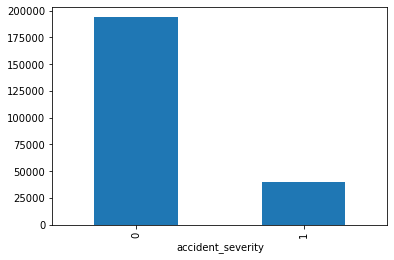

In [15]:
y_df=pd.DataFrame(y)
y_df.pivot_table(index='accident_severity', aggfunc='size').plot(kind='bar')


In [16]:
display(X.dtypes)


age_of_driver                               int64
engine_capacity_cc                          int64
age_of_vehicle                              int64
vehicle_type                               object
vehicle_brand                              object
vehicle_manoeuvre                          object
junction_location                          object
first_point_of_impact                      object
vehicle_left_hand_drive                    object
journey_purpose_of_driver                  object
sex_of_driver                              object
propulsion_code                            object
towing_and_articulation                    object
driver_imd_decile                          object
driver_home_area_type                      object
day_of_week                                object
month                                      object
hour                                       object
easting_binned                             object
northing_binned                            object


## Ordinal Encoding

In [17]:
X["vehicle_type"] = X["vehicle_type"].replace({"1" : "1", "2" : "2", "3" : "2", "4" : "2", "5" : "2", "8" : "3", "9" : "3"
                                          , "10" : "4", "11" : "5", "16" : "2", "17" : "5", "18" : "6", "19" : "7", 
                                           "20" : "7", "21" : "7", "22" : "2", "23" : "2", "90" : "3", "97" : "2",
                                           "98" : "7", "99" : "3", "103" : "2", "104" : "2", "105" : "2", "106" : "2",
                                           "108" : "3", "109" : "3", "110" : "4", 
                                           "103" : "7" }).astype(int)

X["vehicle_type"] = pd.to_numeric(X["vehicle_type"], errors='coerce')

display(X.head())
display(X.shape)

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_brand,vehicle_manoeuvre,junction_location,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,propulsion_code,towing_and_articulation,driver_imd_decile,driver_home_area_type,day_of_week,month,hour,easting_binned,northing_binned,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
247441,24,1997,1,9,Other,16.0,0.0,1.0,1.0,5.0,1.0,1.0,0.0,2.0,1.0,7,5,3,J,N,1.0,5.0,0.0,3,6.0,30.0,0.0,4.0,6.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0
247442,19,1856,7,2,Other,16.0,0.0,2.0,1.0,5.0,1.0,1.0,0.0,2.0,1.0,7,5,3,J,N,1.0,5.0,0.0,3,6.0,30.0,0.0,4.0,6.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0
247443,33,1797,8,9,Other,16.0,1.0,2.0,1.0,5.0,1.0,80.0,0.0,9.0,1.0,1,1,1,J,N,5.0,1.0,0.0,3,6.0,30.0,3.0,4.0,6.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,2.0
247444,40,2204,12,9,Other,16.0,1.0,1.0,1.0,5.0,1.0,1.0,0.0,2.0,1.0,1,1,1,J,N,5.0,1.0,0.0,3,6.0,30.0,3.0,4.0,6.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,2.0
247445,40,1856,7,9,Other,16.0,1.0,1.0,1.0,5.0,1.0,1.0,0.0,2.0,1.0,1,1,0,J,N,3.0,7.0,0.0,3,6.0,30.0,3.0,4.0,5.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0


(233897, 38)

In [18]:
X.dtypes

age_of_driver                               int64
engine_capacity_cc                          int64
age_of_vehicle                              int64
vehicle_type                                int32
vehicle_brand                              object
vehicle_manoeuvre                          object
junction_location                          object
first_point_of_impact                      object
vehicle_left_hand_drive                    object
journey_purpose_of_driver                  object
sex_of_driver                              object
propulsion_code                            object
towing_and_articulation                    object
driver_imd_decile                          object
driver_home_area_type                      object
day_of_week                                object
month                                      object
hour                                       object
easting_binned                             object
northing_binned                            object


## Train-test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#stratify option is used here because the class sizes in the target is imbalanced. Stratified sampling 
#will ensure the same proportions of class size in the train and test target set as the original dataframe.

<AxesSubplot:xlabel='accident_severity'>

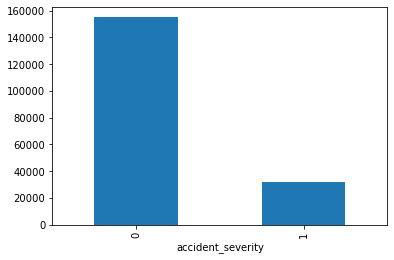

In [20]:
# verifying that class distribution in the train set is same as the input data

y_train_df=pd.DataFrame(y_train)
y_train_df.pivot_table(index='accident_severity', aggfunc='size').plot(kind='bar')


## MinMaxScaling & Encoding (X_train)

In [21]:
#MinMaxScaling

from sklearn.preprocessing import MinMaxScaler

X_train_num = X_train.select_dtypes(include = np.number)

transformer = MinMaxScaler().fit(X_train_num) 
pickle.dump(transformer,open('minmaxtransformer_38features.p', 'wb')) # keep the transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type
0,0.759494,0.083139,0.20,0.082474
1,0.518987,0.105940,0.65,0.082474
2,0.607595,0.119741,0.20,0.072165
3,0.430380,0.126342,0.45,0.185567
4,0.392405,0.132942,0.30,0.082474


In [22]:
X_train_norm.shape

(187117, 4)

In [23]:
#OneHotEncoding

from sklearn.preprocessing import OneHotEncoder

X_train_categorical = X_train.select_dtypes(include = object)

encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_categorical) 
pickle.dump(encoder,open('onehotencoder_38features.p', 'wb')) # keep the encoder
cols=encoder.get_feature_names_out(input_features=X_train_categorical.columns)
encoded = encoder.transform(X_train_categorical).toarray()
X_train_cat = pd.DataFrame(encoded,columns=cols)
X_train_cat.head()

,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_80.0,towing_and_articulation_80.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_surface_conditions_80.0,special_conditions_at_site_1.0,special_conditions_at_site_2.0,special_conditions_at_site_3.0,special_conditions_at_site_4.0,special_conditions_at_site_5.0,special_conditions_at_site_6.0,special_conditions_at_site_7.0,carriageway_hazards_1.0,carriageway_hazards_2.0,carriageway_hazards_3.0,carriageway_hazards_6.0,carriageway_hazards_7.0,urban_or_rural_area_2.0,trunk_road_flag_2.0
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

In [24]:
X_train_cat.shape

(187117, 182)

In [25]:
# Building the transformed X_train by concatenating X_train_norm and X_train_cat

X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

## MinMaxScaling & Encoding (X_test)

In [26]:
# MinMaxScaling
X_test_num = X_test.select_dtypes(include = np.number) # for numericals

X_test_normalized = transformer.transform(X_test_num) # using the transformer that was trained on the training data
X_test_norm = pd.DataFrame(X_test_normalized)

# OneHotEncoding
X_test_categorical = X_test.select_dtypes(include = object) # for categoricals

cols=encoder.get_feature_names_out(input_features=X_test_categorical.columns)
encoded = encoder.transform(X_test_categorical).toarray() # using the encoder that was trained on the training data
X_test_cat = pd.DataFrame(encoded,columns=cols)
X_test_cat.head()

,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_80.0,towing_and_articulation_80.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_surface_conditions_80.0,special_conditions_at_site_1.0,special_conditions_at_site_2.0,special_conditions_at_site_3.0,special_conditions_at_site_4.0,special_conditions_at_site_5.0,special_conditions_at_site_6.0,special_conditions_at_site_7.0,carriageway_hazards_1.0,carriageway_hazards_2.0,carriageway_hazards_3.0,carriageway_hazards_6.0,carriageway_hazards_7.0,urban_or_rural_area_2.0,trunk_road_flag_2.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [27]:
display(X_test_norm.shape)
display(X_test_cat.shape)

(46780, 4)

(46780, 182)

In [28]:
#Concatenation
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

# Predictive model pipeline

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [30]:
# set prediction counter
i=1

# First, create a DataFrame to monitor the metrics and improvement of each model
prediction_scores = pd.DataFrame(columns=['Method', 'Round', 'Train_recall', 
                                          'Accuracy','Precision','Recall',
                                          'F1','True_positives',
                                          'Imbalance_treatment',
                                          'Feature_selection',
                                          'Notes'])


In [31]:
# Define a function of model pipeline to try various classifiers

def model_predict(X_train, X_test, y_train, y_test, pred_scores, m=0, treatment = 'No T', fselection = 'No FS', describe='No D'):
    
    ################# LogisticRegression() ##########################
    log_reg = LogisticRegression(solver='saga').fit(X_train, y_train)
    mean_train_score_log_reg = np.mean(cross_val_score(log_reg, X_train, y_train, cv=10, scoring = 'recall'))
    
    log_reg_predictions = log_reg.predict(X_test)
    
    pickle.dump(log_reg,open(f'LogisticRegression_{m}.p', 'wb'))
    
    # metrics
    dict_metrics_1 = {'Method':'LogisticRegression',
                      'Round':m,
                      'Train_recall': round(mean_train_score_log_reg,3),
                      'Accuracy':round(log_reg.score(X_test, y_test),3),
                      'Precision':round(precision_score(y_test,log_reg_predictions, pos_label=1),3),
                      'Recall': round(recall_score(y_test,log_reg_predictions, pos_label=1),3),
                      'F1':round(f1_score(y_test,log_reg_predictions, pos_label=1),3),
                      'True_positives':confusion_matrix(y_test, log_reg_predictions)[1][1],
                      'Imbalance_treatment': treatment,
                      'Feature_selection': fselection,
                      'Notes':describe}
    
    pred_scores = pd.concat([pred_scores, pd.DataFrame([dict_metrics_1])], ignore_index=True)
    
    ################## KNeighborsClassifier() ######################
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train, y_train)
    mean_train_score_knn_clf = np.mean(cross_val_score(knn_clf, X_train, y_train, cv=10, scoring = 'recall'))
                                 
    knn_clf_predictions = knn_clf.predict(X_test)
    
    pickle.dump(knn_clf,open(f'KNeighborsClassifier_{m}.p', 'wb'))
    
    # metrics
    dict_metrics_2 = {'Method':'KNeighborsClassifier',
                      'Round':m,
                      'Train_recall': round(mean_train_score_knn_clf,3),
                      'Accuracy':round(knn_clf.score(X_test, y_test),3),
                      'Precision':round(precision_score(y_test,knn_clf_predictions, pos_label=1),3),
                      'Recall': round(recall_score(y_test,knn_clf_predictions, pos_label=1),3),
                      'F1':round(f1_score(y_test,knn_clf_predictions, pos_label=1),3),
                      'True_positives':confusion_matrix(y_test, knn_clf_predictions)[1][1],
                      'Imbalance_treatment': treatment,
                      'Feature_selection': fselection,
                      'Notes':describe}
    
    pred_scores = pd.concat([pred_scores, pd.DataFrame([dict_metrics_2])], ignore_index=True)
    
    ################## DecisionTreeClassifier() #####################
    dt_clf= DecisionTreeClassifier()
    
    ### Random Search for Hyperparameter Optimization
    
    # Values to be explored for each parameter
    max_depth_choices= [3,4,5,6,7,8,9,10,None]
    criterion_choices = ['gini','entropy']
    min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
    min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
    max_features_choices = [2,3,4,5,6]

    random_grid = {'max_depth': max_depth_choices,
                   'criterion': criterion_choices,
                   'min_samples_split': min_samples_split_choices,
                   'min_samples_leaf': min_samples_leaf_choices,
                   'max_features': max_features_choices}

    dt_clf_randsearch = RandomizedSearchCV(estimator = dt_clf,
                                           param_distributions = random_grid, scoring= 'recall', 
                                           n_iter=25, cv = 10, n_jobs = -1)
    # n_iter= 25 means try 25 different combination. Here we are building
            # n_iter * cv number of models, which is 250 models.
        
    dt_clf_randsearch.fit(X_train,y_train) # In this line we actually build the model
    dt_clf_randsearch_predictions = dt_clf_randsearch.predict(X_test)
    
    pickle.dump(dt_clf_randsearch,open(f'DecisionTreeClassifier_{m}.p', 'wb'))
    
    # metrics
    dict_metrics_3 = {'Method':'DecisionTreeClassifier',
                      'Round':m,
                      'Train_recall': round(dt_clf_randsearch.best_score_,3), 
                      'Accuracy':'', # Not needed. Hyperparameters are optimized for recall
                      'Precision':round(precision_score(y_test,dt_clf_randsearch_predictions, pos_label=1),3),
                      'Recall': round(recall_score(y_test,dt_clf_randsearch_predictions, pos_label=1),3),
                      'F1':round(f1_score(y_test,dt_clf_randsearch_predictions, pos_label=1),3),
                      'True_positives':confusion_matrix(y_test, dt_clf_randsearch_predictions)[1][1],
                      'Imbalance_treatment': treatment,
                      'Feature_selection': fselection,
                      'Notes':describe}
    
    pred_scores = pd.concat([pred_scores, pd.DataFrame([dict_metrics_3])], ignore_index=True)
        
    #################### RandomForestClassifier() ###################
    rf_clf= RandomForestClassifier()
    
    ### Random Search for Hyperparameter Optimization

    rf_clf_randsearch = RandomizedSearchCV(estimator = rf_clf,
                                           param_distributions = random_grid, scoring= 'recall',
                                           n_iter=5, cv = 10, n_jobs = -1)
    rf_clf_randsearch.fit(X_train,y_train) # In this line we actually build the model
    rf_clf_randsearch_predictions = rf_clf_randsearch.predict(X_test)
    
    pickle.dump(rf_clf_randsearch,open(f'RandomForestClassifier_{m}.p', 'wb'))
    
    # metrics
    dict_metrics_4 = {'Method':'RandomForestClassifier',
                      'Round':m,
                      'Train_recall': round(rf_clf_randsearch.best_score_,3), 
                      'Accuracy':'', # Not needed. Hyperparameters are optimized for recall
                      'Precision':round(precision_score(y_test,rf_clf_randsearch_predictions, pos_label=1),3),
                      'Recall': round(recall_score(y_test,rf_clf_randsearch_predictions, pos_label=1),3),
                      'F1':round(f1_score(y_test,rf_clf_randsearch_predictions, pos_label=1),3),
                      'True_positives':confusion_matrix(y_test, rf_clf_randsearch_predictions)[1][1],
                      'Imbalance_treatment': treatment,
                      'Feature_selection': fselection,
                      'Notes':describe}
    
    pred_scores = pd.concat([pred_scores, pd.DataFrame([dict_metrics_4])], ignore_index=True)
    
    # display all metrics
    display(pred_scores)
    
    return pred_scores


In [32]:
# Notes for educational purposes:

# In this project, I am dealing with a BINARY classification problem. But if this was a MULTICLASS classification,
   
# I would add multi_class='multinomial' while building the model. Like this:

# classification = LogisticRegression(random_state=42, solver='saga', multi_class='multinomial').fit(X_train_transformed, y_train)

# And when calculating the scores:

# if this was a multiclass classification, I would delete: pos_label='Serious', and add: average='weighted'
# average parameter is required for multiclass/multilabel targets.
# average='weighted':
# Calculate metrics for each label, and find their average weighted by support 
    #(the number of true instances for each label). This alters ‘macro’ to account for label imbalance; 
    #it can result in an F-score that is not between precision and recall.

# Models with data that has imbalance in the target variable

In [33]:
# set model number
m_num = 1

# add description of changes
treat = 'None. Target is imbalanced'
fselec = 'None'
desc = '34 categorical + 4 numerical features'

# run the model pipeline
prediction_scores= model_predict(X_train_transformed,
                                 X_test_transformed,
                                 y_train,
                                 y_test,
                                 pred_scores=prediction_scores,
                                 m=m_num,
                                 treatment=treat,
                                 fselection = fselec,
                                 describe=desc)


C:\Users\ecyildirim\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Round,Train_recall,Accuracy,Precision,Recall,F1,True_positives,Imbalance_treatment,Feature_selection,Notes
0,LogisticRegression,1,0.002,0.828,0.421,0.002,0.004,16,None. Target is imbalanced,None,34 categorical + 4 numerical features
1,KNeighborsClassifier,1,0.188,0.831,0.522,0.199,0.288,1597,None. Target is imbalanced,None,34 categorical + 4 numerical features
2,DecisionTreeClassifier,1,0.041,,0.412,0.042,0.077,340,None. Target is imbalanced,None,34 categorical + 4 numerical features
3,RandomForestClassifier,1,0.0,,0.0,0.0,0.0,0,None. Target is imbalanced,None,34 categorical + 4 numerical features


In [34]:
# The accuracy of 0.83 is not bad at first sight but the confusion matrix & recall tell a different story.
# These models fail in predicting the seriously-severe accidents. And this is too expensive! 

# In our case, false positives are much more preferred to false negatives. In other words, we would prefer
# a potentially 'slightly-severe' accident to be predicted as 'seriously-severe', rather than a 
# 'seriously-severe' potential accident to be predicted as 'slightly-severe'. 
# If anything at all, this could even be beneficial for the drivers that are prone to slightly-severe
# accidents because they would be more alert on the road due to the harsh prediction of a 'severe' accident.

# One of the most important reason why the current model fails is that the class sizes in the target is imbalanced.
# I will treat the imbalance in the training dataset below to improve the model. In principle, the methods
# to handle the imbalacy in the data SMOTE, oversampling, and undersampling increase recall
# at the cost of lower precision. This would also be our preference in this case.


# Models after imbalance treatments

In [35]:
#!pip install imblearn --user

## Models (Imbalance treatment: SMOTE)

In [36]:
from imblearn.over_sampling import SMOTE #creates synthetic samples using KNN
sm = SMOTE(random_state=42, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)
X_train_SMOTE.shape

(309974, 186)

In [37]:
# set model number
m_num = 2

# add description of changes
treat = 'SMOTE'
fselec = 'None'
desc = '34 categorical + 4 numerical features'

# run the model pipeline
prediction_scores= model_predict(X_train_SMOTE,
                                 X_test_transformed,
                                 y_train_SMOTE,
                                 y_test,
                                 pred_scores=prediction_scores,
                                 m=m_num,
                                 treatment=treat,
                                 fselection=fselec,
                                 describe=desc)


,Method,Round,Train_recall,Accuracy,Precision,Recall,F1,True_positives,Imbalance_treatment,Feature_selection,Notes
0,LogisticRegression,1,0.002,0.828,0.421,0.002,0.004,16,None. Target is imbalanced,None,34 categorical + 4 numerical features
1,KNeighborsClassifier,1,0.188,0.831,0.522,0.199,0.288,1597,None. Target is imbalanced,None,34 categorical + 4 numerical features
2,DecisionTreeClassifier,1,0.041,,0.412,0.042,0.077,340,None. Target is imbalanced,None,34 categorical + 4 numerical features
3,RandomForestClassifier,1,0.0,,0.0,0.0,0.0,0,None. Target is imbalanced,None,34 categorical + 4 numerical features
4,LogisticRegression,2,0.647,0.6,0.237,0.598,0.34,4806,SMOTE,None,34 categorical + 4 numerical features
5,KNeighborsClassifier,2,0.998,0.55,0.251,0.817,0.384,6561,SMOTE,None,34 categorical + 4 numerical features
6,DecisionTreeClassifier,2,0.736,,0.212,0.444,0.287,3570,SMOTE,None,34 categorical + 4 numerical features
7,RandomForestClassifier,2,0.78,,0.271,0.39,0.319,3132,SMOTE,None,34 categorical + 4 numerical features


## Models (Imbalance treatment: OVERSAMPLING)

In [38]:
from sklearn.utils import resample # this function does over and under sampling

In [39]:
# We will need to concat the training X and y to do oversampling and undersampling. 
# For that, index-resetting is needed because the transformations resetted the index for X_train_transformed

y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 

In [40]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: accident_severity, dtype: int32

In [41]:
X_train_transformed_df = pd.concat([X_train_norm, X_train_cat], axis=1)
X_test_transformed_df = pd.concat([X_test_norm, X_test_cat], axis=1)

In [42]:
X_train_transformed_df.shape

(187117, 186)

In [43]:
train = pd.concat([X_train_transformed_df, y_train],axis=1)
train.head()


,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_80.0,towing_and_articulation_80.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_surface_conditions_80.0,special_conditions_at_site_1.0,special_conditions_at_site_2.0,special_conditions_at_site_3.0,special_conditions_at_site_4.0,special_conditions_at_site_5.0,special_conditions_at_site_6.0,special_conditions_at_site_7.0,carriageway_hazards_1.0,carriageway_hazards_2.0,carriageway_hazards_3.0,carriageway_hazards_6.0,carriageway_hazards_7.0,urban_or_rural_area_2.0,trunk_road_flag_2.0,accident_severity
0,0.759494,0.083139,0.20,0.082474,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0

In [44]:
slight = train[train['accident_severity']==0]
serious = train[train['accident_severity']==1]

In [45]:
display(slight.shape)
display(serious.shape)

(154987, 187)

(32130, 187)

In [46]:
# oversample minority
serious_oversampled = resample(serious, #<- sample from here
                                replace=True, #<- we need replacement, since we don't have enough data otherwise
                                n_samples = len(slight))#<- make both sets the same size


In [47]:
# both sets are now of a reasonable size
display(slight.shape)
display(serious_oversampled.shape)
serious_oversampled.head(2)

(154987, 187)

(154987, 187)

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_80.0,towing_and_articulation_80.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_surface_conditions_80.0,special_conditions_at_site_1.0,special_conditions_at_site_2.0,special_conditions_at_site_3.0,special_conditions_at_site_4.0,special_conditions_at_site_5.0,special_conditions_at_site_6.0,special_conditions_at_site_7.0,carriageway_hazards_1.0,carriageway_hazards_2.0,carriageway_hazards_3.0,carriageway_hazards_6.0,carriageway_hazards_7.0,urban_or_rural_area_2.0,trunk_road_flag_2.0,accident_severity
48438,0.430380,0.123675,0.35,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [48]:
train_oversampled = pd.concat([slight,serious_oversampled],axis=0)
train_oversampled.tail()

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_80.0,towing_and_articulation_80.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_surface_conditions_80.0,special_conditions_at_site_1.0,special_conditions_at_site_2.0,special_conditions_at_site_3.0,special_conditions_at_site_4.0,special_conditions_at_site_5.0,special_conditions_at_site_6.0,special_conditions_at_site_7.0,carriageway_hazards_1.0,carriageway_hazards_2.0,carriageway_hazards_3.0,carriageway_hazards_6.0,carriageway_hazards_7.0,urban_or_rural_area_2.0,trunk_road_flag_2.0,accident_severity
56729,0.303797,0.127275,0.55,0.082474,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0

In [49]:
y_train_over = train_oversampled['accident_severity'].copy()
X_train_over = train_oversampled.drop('accident_severity',axis = 1).copy()

In [50]:
X_train_over_arr= X_train_over.to_numpy()
X_test_transformed_arr=X_test_transformed_df.to_numpy()

In [51]:
# set model number
m_num = 3

# add description of changes
treat = 'Oversampling'
fselec = 'None'
desc = '34 categorical + 4 numerical features'

# run the model pipeline
prediction_scores= model_predict(X_train_over_arr,
                                 X_test_transformed_arr,
                                 y_train_over,
                                 y_test,
                                 pred_scores=prediction_scores,
                                 m=m_num,
                                 treatment=treat,
                                 fselection = fselec,
                                 describe=desc)


,Method,Round,Train_recall,Accuracy,Precision,Recall,F1,True_positives,Imbalance_treatment,Feature_selection,Notes
0,LogisticRegression,1,0.002,0.828,0.421,0.002,0.004,16,None. Target is imbalanced,None,34 categorical + 4 numerical features
1,KNeighborsClassifier,1,0.188,0.831,0.522,0.199,0.288,1597,None. Target is imbalanced,None,34 categorical + 4 numerical features
2,DecisionTreeClassifier,1,0.041,,0.412,0.042,0.077,340,None. Target is imbalanced,None,34 categorical + 4 numerical features
3,RandomForestClassifier,1,0.0,,0.0,0.0,0.0,0,None. Target is imbalanced,None,34 categorical + 4 numerical features
4,LogisticRegression,2,0.647,0.6,0.237,0.598,0.34,4806,SMOTE,None,34 categorical + 4 numerical features
5,KNeighborsClassifier,2,0.998,0.55,0.251,0.817,0.384,6561,SMOTE,None,34 categorical + 4 numerical features
6,DecisionTreeClassifier,2,0.736,,0.212,0.444,0.287,3570,SMOTE,None,34 categorical + 4 numerical features
7,RandomForestClassifier,2,0.78,,0.271,0.39,0.319,3132,SMOTE,None,34 categorical + 4 numerical features
8,LogisticRegression,3,0.613,0.601,0.24,0.613,0.345,4926,Oversampling,None,34 categorical + 4 numerical features
9,KNeighborsClassifier,3,0.996,0.691,0.311,0.655,0.422,5263,Oversampling,None,34 categorical + 4 numerical features


## Models (Imbalance treatment: UNDERSAMPLING)

In [52]:
# undersample majority
slight_undersampled = resample(slight, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(serious))

In [53]:
# both sets are the same size
# small, but balanced, and no repeated data
display(serious.shape)
display(slight_undersampled.shape)

(32130, 187)

(32130, 187)

In [54]:
train_undersampled = pd.concat([serious,slight_undersampled], axis=0)
train_undersampled.tail()

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_80.0,towing_and_articulation_80.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_surface_conditions_80.0,special_conditions_at_site_1.0,special_conditions_at_site_2.0,special_conditions_at_site_3.0,special_conditions_at_site_4.0,special_conditions_at_site_5.0,special_conditions_at_site_6.0,special_conditions_at_site_7.0,carriageway_hazards_1.0,carriageway_hazards_2.0,carriageway_hazards_3.0,carriageway_hazards_6.0,carriageway_hazards_7.0,urban_or_rural_area_2.0,trunk_road_flag_2.0,accident_severity
138372,0.392405,0.097340,0.10,0.082474,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.

In [55]:
y_train_under = train_undersampled['accident_severity'].copy()
X_train_under = train_undersampled.drop('accident_severity',axis = 1).copy()

In [56]:
X_train_under_arr= X_train_under.to_numpy()

In [57]:
# set model number
m_num = 4

# add description of changes
treat = 'Undersampling'
fselec = 'None'
desc = '34 categorical + 4 numerical features'

# run the model pipeline
prediction_scores= model_predict(X_train_under_arr,
                                 X_test_transformed_arr,
                                 y_train_under,
                                 y_test,
                                 pred_scores=prediction_scores,
                                 m=m_num,
                                 treatment=treat,
                                 fselection = fselec,
                                 describe=desc)


,Method,Round,Train_recall,Accuracy,Precision,Recall,F1,True_positives,Imbalance_treatment,Feature_selection,Notes
0,LogisticRegression,1,0.002,0.828,0.421,0.002,0.004,16,None. Target is imbalanced,None,34 categorical + 4 numerical features
1,KNeighborsClassifier,1,0.188,0.831,0.522,0.199,0.288,1597,None. Target is imbalanced,None,34 categorical + 4 numerical features
2,DecisionTreeClassifier,1,0.041,,0.412,0.042,0.077,340,None. Target is imbalanced,None,34 categorical + 4 numerical features
3,RandomForestClassifier,1,0.0,,0.0,0.0,0.0,0,None. Target is imbalanced,None,34 categorical + 4 numerical features
4,LogisticRegression,2,0.647,0.6,0.237,0.598,0.34,4806,SMOTE,None,34 categorical + 4 numerical features
5,KNeighborsClassifier,2,0.998,0.55,0.251,0.817,0.384,6561,SMOTE,None,34 categorical + 4 numerical features
6,DecisionTreeClassifier,2,0.736,,0.212,0.444,0.287,3570,SMOTE,None,34 categorical + 4 numerical features
7,RandomForestClassifier,2,0.78,,0.271,0.39,0.319,3132,SMOTE,None,34 categorical + 4 numerical features
8,LogisticRegression,3,0.613,0.601,0.24,0.613,0.345,4926,Oversampling,None,34 categorical + 4 numerical features
9,KNeighborsClassifier,3,0.996,0.691,0.311,0.655,0.422,5263,Oversampling,None,34 categorical + 4 numerical features


# Feature Selection (k-best)

Some material to explore:

https://machinelearningmastery.com/feature-selection-with-categorical-data/

https://github.com/atulpatelDS/Youtube/blob/main/Feature_Engineering/Categorical%20Feature%20Selection%20using%20sklearn%20Library%20chi2%20and%20SelectKbest%20function%20Tutorial%2013.ipynb


In [58]:
from sklearn.feature_selection import SelectKBest, chi2 # import chi2
# To check the scores (in order to understand which columns are there above in the table)
model_kbest = SelectKBest(chi2, k=10).fit(X_train_cat, y_train)
df = pd.DataFrame(data = model_kbest.scores_, columns = ['score']) #we want to look at the chi2 scores in all of the columns
df['Column'] = X_train_cat.columns
print(df.sort_values(by = ['score'], ascending = False).head(50)) # scores are sorted by descending score


           score                                       Column
134  1517.841266                             speed_limit_60.0
13    911.736322                    first_point_of_impact_2.0
180   769.207058                      urban_or_rural_area_2.0
1     664.662905                        vehicle_manoeuvre_3.0
157   633.660433                         light_conditions_6.0
2     590.464775                        vehicle_manoeuvre_4.0
21    403.378621                            sex_of_driver_2.0
136   357.687263                          junction_detail_1.0
144   339.590268                        second_road_class_3.0
86    303.006047                            northing_binned_N
131   289.747645                             speed_limit_30.0
7     277.049389                       vehicle_manoeuvre_16.0
140   275.974616                         junction_control_2.0
8     268.783778                        junction_location_1.0
34    243.979206                    driver_home_area_type_3.0
83    22

In [59]:
# Let's try modeling with the first 25 encoded features (+ numericals)

In [60]:
df_cat_selected= df.sort_values(by = ['score'], ascending = False).head(25)

In [61]:
selected_cat_cols= df_cat_selected['Column'].unique().tolist()

In [62]:
selected_cat_cols

['speed_limit_60.0',
 'first_point_of_impact_2.0',
 'urban_or_rural_area_2.0',
 'vehicle_manoeuvre_3.0',
 'light_conditions_6.0',
 'vehicle_manoeuvre_4.0',
 'sex_of_driver_2.0',
 'junction_detail_1.0',
 'second_road_class_3.0',
 'northing_binned_N',
 'speed_limit_30.0',
 'vehicle_manoeuvre_16.0',
 'junction_control_2.0',
 'junction_location_1.0',
 'driver_home_area_type_3.0',
 'easting_binned_J',
 'vehicle_manoeuvre_13.0',
 'vehicle_direction_from_1.0',
 'vehicle_direction_to_5.0',
 'northing_binned_P',
 'first_point_of_impact_1.0',
 'road_type_6.0',
 'driver_home_area_type_2.0',
 'hour_8',
 'northing_binned_T']

In [117]:
with open('selected_cat_cols.p', 'wb') as f:
    pickle.dump(selected_cat_cols, f)

In [63]:
X_train_cat_selected_1 = X_train_cat[selected_cat_cols]
X_test_cat_selected_1 = X_test_cat[selected_cat_cols]

In [64]:
X_train_cat_selected_1.head()

,speed_limit_60.0,first_point_of_impact_2.0,urban_or_rural_area_2.0,vehicle_manoeuvre_3.0,light_conditions_6.0,vehicle_manoeuvre_4.0,sex_of_driver_2.0,junction_detail_1.0,second_road_class_3.0,northing_binned_N,speed_limit_30.0,vehicle_manoeuvre_16.0,junction_control_2.0,junction_location_1.0,driver_home_area_type_3.0,easting_binned_J,vehicle_manoeuvre_13.0,vehicle_direction_from_1.0,vehicle_direction_to_5.0,northing_binned_P,first_point_of_impact_1.0,road_type_6.0,driver_home_area_type_2.0,hour_8,northing_binned_T
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Building the transformed train and test sets
X_train_transformed_fs_1 = np.concatenate([X_train_norm, X_train_cat_selected_1], axis=1)
#Concatenation
X_test_transformed_fs_1 = np.concatenate([X_test_norm, X_test_cat_selected_1], axis=1)

# Models after feature selection (k-best)

## Imbalance treatment: SMOTE

In [66]:
del X_train_SMOTE, y_train_SMOTE

from imblearn.over_sampling import SMOTE #creates synthetic samples using KNN
sm_fs = SMOTE(random_state=42, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm_fs.fit_resample(X_train_transformed_fs_1,y_train)
X_train_SMOTE.shape

(309974, 29)

In [67]:
# set model number
m_num = 5

# add description of changes
treat = 'SMOTE'
fselec = 'K-best'
desc = '25 encoded + 4 numerical columns'

# run the model pipeline
prediction_scores= model_predict(X_train_SMOTE,
                                 X_test_transformed_fs_1,
                                 y_train_SMOTE,
                                 y_test,
                                 pred_scores=prediction_scores,
                                 m=m_num,
                                 treatment=treat,
                                 fselection = fselec,
                                 describe=desc)


,Method,Round,Train_recall,Accuracy,Precision,Recall,F1,True_positives,Imbalance_treatment,Feature_selection,Notes
0,LogisticRegression,1,0.002,0.828,0.421,0.002,0.004,16,None. Target is imbalanced,None,34 categorical + 4 numerical features
1,KNeighborsClassifier,1,0.188,0.831,0.522,0.199,0.288,1597,None. Target is imbalanced,None,34 categorical + 4 numerical features
2,DecisionTreeClassifier,1,0.041,,0.412,0.042,0.077,340,None. Target is imbalanced,None,34 categorical + 4 numerical features
3,RandomForestClassifier,1,0.0,,0.0,0.0,0.0,0,None. Target is imbalanced,None,34 categorical + 4 numerical features
4,LogisticRegression,2,0.647,0.6,0.237,0.598,0.34,4806,SMOTE,None,34 categorical + 4 numerical features
5,KNeighborsClassifier,2,0.998,0.55,0.251,0.817,0.384,6561,SMOTE,None,34 categorical + 4 numerical features
6,DecisionTreeClassifier,2,0.736,,0.212,0.444,0.287,3570,SMOTE,None,34 categorical + 4 numerical features
7,RandomForestClassifier,2,0.78,,0.271,0.39,0.319,3132,SMOTE,None,34 categorical + 4 numerical features
8,LogisticRegression,3,0.613,0.601,0.24,0.613,0.345,4926,Oversampling,None,34 categorical + 4 numerical features
9,KNeighborsClassifier,3,0.996,0.691,0.311,0.655,0.422,5263,Oversampling,None,34 categorical + 4 numerical features


## Imbalance treatment: Oversampling

In [68]:
from sklearn.utils import resample # this function does over and under sampling

In [69]:
# We will need to concat the training X and y to do oversampling and undersampling. 
# For that, index-resetting is needed because the transformations resetted the index for X_train_transformed

y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 

In [70]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: accident_severity, dtype: int32

In [71]:
X_train_transformed_fs_1_df = pd.concat([X_train_norm, X_train_cat_selected_1], axis=1)
X_test_transformed_fs_1_df = pd.concat([X_test_norm, X_test_cat_selected_1], axis=1)

In [72]:
train_fs_1 = pd.concat([X_train_transformed_fs_1_df, y_train],axis=1)
train_fs_1.head()


,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,speed_limit_60.0,first_point_of_impact_2.0,urban_or_rural_area_2.0,vehicle_manoeuvre_3.0,light_conditions_6.0,vehicle_manoeuvre_4.0,sex_of_driver_2.0,junction_detail_1.0,second_road_class_3.0,northing_binned_N,speed_limit_30.0,vehicle_manoeuvre_16.0,junction_control_2.0,junction_location_1.0,driver_home_area_type_3.0,easting_binned_J,vehicle_manoeuvre_13.0,vehicle_direction_from_1.0,vehicle_direction_to_5.0,northing_binned_P,first_point_of_impact_1.0,road_type_6.0,driver_home_area_type_2.0,hour_8,northing_binned_T,accident_severity
0,0.759494,0.083139,0.20,0.082474,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,0.518987,0.105940,0.65,0.082474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,0.607595,0.119741,0.20,0.072165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.430380,0.126342,0.45,0.185567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.392405,0.132942,0.30,0.082474,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [73]:
slight_fs_1 = train_fs_1[train_fs_1['accident_severity']==0]
serious_fs_1 = train_fs_1[train_fs_1['accident_severity']==1]

In [74]:
display(slight_fs_1.shape)
display(serious_fs_1.shape)

(154987, 30)

(32130, 30)

In [75]:
# oversample minority
serious_oversampled_fs_1 = resample(serious_fs_1, #<- sample from here
                                replace=True, #<- we need replacement, since we don't have enough data otherwise
                                n_samples = len(slight_fs_1))#<- make both sets the same size


In [76]:
# both sets are now of a reasonable size
display(slight_fs_1.shape)
display(serious_oversampled_fs_1.shape)
serious_oversampled_fs_1.head(10)

(154987, 30)

(154987, 30)

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,speed_limit_60.0,first_point_of_impact_2.0,urban_or_rural_area_2.0,vehicle_manoeuvre_3.0,light_conditions_6.0,vehicle_manoeuvre_4.0,sex_of_driver_2.0,junction_detail_1.0,second_road_class_3.0,northing_binned_N,speed_limit_30.0,vehicle_manoeuvre_16.0,junction_control_2.0,junction_location_1.0,driver_home_area_type_3.0,easting_binned_J,vehicle_manoeuvre_13.0,vehicle_direction_from_1.0,vehicle_direction_to_5.0,northing_binned_P,first_point_of_impact_1.0,road_type_6.0,driver_home_area_type_2.0,hour_8,northing_binned_T,accident_severity
163434,0.734177,0.106474,0.50,0.082474,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1025,0.506329,0.106474,0.10,0.082474,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
52024,0.632911,0.079872,0.70,0.082474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1
146621,0.594937,0.106474,0.80,0.082474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
37459,0.278481,0.127275,0.45,0.082474,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
117417,0.569620,0.123675,0.35,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
103916,0.278481,0.123675,0.35,0.917526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
85803,0.417722,0.105740,0.75,0.082474,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
57947,0.645570,0.131142,0.25,0.082474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
120425,0.531646,0.074872,0.80,0.082474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [77]:
train_oversampled_fs_1 = pd.concat([slight_fs_1,serious_oversampled_fs_1],axis=0)
train_oversampled_fs_1.tail()

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,speed_limit_60.0,first_point_of_impact_2.0,urban_or_rural_area_2.0,vehicle_manoeuvre_3.0,light_conditions_6.0,vehicle_manoeuvre_4.0,sex_of_driver_2.0,junction_detail_1.0,second_road_class_3.0,northing_binned_N,speed_limit_30.0,vehicle_manoeuvre_16.0,junction_control_2.0,junction_location_1.0,driver_home_area_type_3.0,easting_binned_J,vehicle_manoeuvre_13.0,vehicle_direction_from_1.0,vehicle_direction_to_5.0,northing_binned_P,first_point_of_impact_1.0,road_type_6.0,driver_home_area_type_2.0,hour_8,northing_binned_T,accident_severity
150673,0.329114,0.082739,0.40,0.082474,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
125445,0.291139,0.092673,0.85,0.082474,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
5965,0.417722,0.132942,0.35,0.082474,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
150156,0.455696,0.008201,0.15,0.020619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
103523,0.556962,0.092606,0.45,0.082474,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [78]:
y_train_over_fs_1 = train_oversampled_fs_1['accident_severity'].copy()
X_train_over_fs_1 = train_oversampled_fs_1.drop('accident_severity',axis = 1).copy()

In [79]:
X_train_over_fs_1_arr= X_train_over_fs_1.to_numpy()
X_test_transformed_fs_1_df_arr=X_test_transformed_fs_1_df.to_numpy()

In [80]:
# set model number
m_num = 6

# add description of changes
treat = 'Oversampling'
fselec = 'K-best'
desc = '25 encoded + 4 numerical columns'

# run the model pipeline
prediction_scores= model_predict(X_train_over_fs_1_arr,
                                 X_test_transformed_fs_1_df_arr,
                                 y_train_over_fs_1,
                                 y_test,
                                 pred_scores=prediction_scores,
                                 m=m_num,
                                 treatment=treat,
                                 fselection = fselec,
                                 describe=desc)


,Method,Round,Train_recall,Accuracy,Precision,Recall,F1,True_positives,Imbalance_treatment,Feature_selection,Notes
0,LogisticRegression,1,0.002,0.828,0.421,0.002,0.004,16,None. Target is imbalanced,None,34 categorical + 4 numerical features
1,KNeighborsClassifier,1,0.188,0.831,0.522,0.199,0.288,1597,None. Target is imbalanced,None,34 categorical + 4 numerical features
2,DecisionTreeClassifier,1,0.041,,0.412,0.042,0.077,340,None. Target is imbalanced,None,34 categorical + 4 numerical features
3,RandomForestClassifier,1,0.0,,0.0,0.0,0.0,0,None. Target is imbalanced,None,34 categorical + 4 numerical features
4,LogisticRegression,2,0.647,0.6,0.237,0.598,0.34,4806,SMOTE,None,34 categorical + 4 numerical features
5,KNeighborsClassifier,2,0.998,0.55,0.251,0.817,0.384,6561,SMOTE,None,34 categorical + 4 numerical features
6,DecisionTreeClassifier,2,0.736,,0.212,0.444,0.287,3570,SMOTE,None,34 categorical + 4 numerical features
7,RandomForestClassifier,2,0.78,,0.271,0.39,0.319,3132,SMOTE,None,34 categorical + 4 numerical features
8,LogisticRegression,3,0.613,0.601,0.24,0.613,0.345,4926,Oversampling,None,34 categorical + 4 numerical features
9,KNeighborsClassifier,3,0.996,0.691,0.311,0.655,0.422,5263,Oversampling,None,34 categorical + 4 numerical features


## Imbalance treatment: Undersampling

In [81]:
# undersample majority
slight_undersampled_fs_1 = resample(slight_fs_1, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(serious_fs_1))

In [82]:
# both sets are the same size
# small, but balanced, and no repeated data
display(serious_fs_1.shape)
display(slight_undersampled_fs_1.shape)

(32130, 30)

(32130, 30)

In [83]:
train_undersampled_fs_1 = pd.concat([serious_fs_1,slight_undersampled_fs_1], axis=0)
train_undersampled_fs_1.tail()

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,speed_limit_60.0,first_point_of_impact_2.0,urban_or_rural_area_2.0,vehicle_manoeuvre_3.0,light_conditions_6.0,vehicle_manoeuvre_4.0,sex_of_driver_2.0,junction_detail_1.0,second_road_class_3.0,northing_binned_N,speed_limit_30.0,vehicle_manoeuvre_16.0,junction_control_2.0,junction_location_1.0,driver_home_area_type_3.0,easting_binned_J,vehicle_manoeuvre_13.0,vehicle_direction_from_1.0,vehicle_direction_to_5.0,northing_binned_P,first_point_of_impact_1.0,road_type_6.0,driver_home_area_type_2.0,hour_8,northing_binned_T,accident_severity
175048,0.708861,0.123675,0.35,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
29201,0.481013,0.123675,0.35,0.082474,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
60838,0.253165,0.099673,0.10,0.082474,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
71709,0.291139,0.007134,0.05,0.020619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
70073,0.481013,0.152410,0.05,0.185567,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [84]:
y_train_under_fs_1 = train_undersampled_fs_1['accident_severity'].copy()
X_train_under_fs_1 = train_undersampled_fs_1.drop('accident_severity',axis = 1).copy()

In [85]:
X_train_under_fs_1_arr= X_train_under_fs_1.to_numpy()

In [86]:
# set model number
m_num = 7

# add description of changes
treat = 'Undersampling'
fselec = 'K-best'
desc = '25 encoded + 4 numerical columns'

# run the model pipeline
prediction_scores= model_predict(X_train_under_fs_1_arr,
                                 X_test_transformed_fs_1_df_arr,
                                 y_train_under_fs_1,
                                 y_test,
                                 pred_scores=prediction_scores,
                                 m=m_num,
                                 treatment=treat,
                                 fselection = fselec,
                                 describe=desc)


,Method,Round,Train_recall,Accuracy,Precision,Recall,F1,True_positives,Imbalance_treatment,Feature_selection,Notes
0,LogisticRegression,1,0.002,0.828,0.421,0.002,0.004,16,None. Target is imbalanced,None,34 categorical + 4 numerical features
1,KNeighborsClassifier,1,0.188,0.831,0.522,0.199,0.288,1597,None. Target is imbalanced,None,34 categorical + 4 numerical features
2,DecisionTreeClassifier,1,0.041,,0.412,0.042,0.077,340,None. Target is imbalanced,None,34 categorical + 4 numerical features
3,RandomForestClassifier,1,0.0,,0.0,0.0,0.0,0,None. Target is imbalanced,None,34 categorical + 4 numerical features
4,LogisticRegression,2,0.647,0.6,0.237,0.598,0.34,4806,SMOTE,None,34 categorical + 4 numerical features
5,KNeighborsClassifier,2,0.998,0.55,0.251,0.817,0.384,6561,SMOTE,None,34 categorical + 4 numerical features
6,DecisionTreeClassifier,2,0.736,,0.212,0.444,0.287,3570,SMOTE,None,34 categorical + 4 numerical features
7,RandomForestClassifier,2,0.78,,0.271,0.39,0.319,3132,SMOTE,None,34 categorical + 4 numerical features
8,LogisticRegression,3,0.613,0.601,0.24,0.613,0.345,4926,Oversampling,None,34 categorical + 4 numerical features
9,KNeighborsClassifier,3,0.996,0.691,0.311,0.655,0.422,5263,Oversampling,None,34 categorical + 4 numerical features


# Models with reduced number of features (from 38 to 22 features in total)

In [87]:
# The categorical features which are ranked as important in k-best + a total of 4 numerical features are selected:

In [88]:
X=all_df_2017[['speed_limit', 'first_point_of_impact', 'urban_or_rural_area','vehicle_manoeuvre','light_conditions',
       'sex_of_driver','junction_detail','second_road_class', 'northing_binned',
       'junction_control', 'junction_location','driver_home_area_type', 'easting_binned',
       'vehicle_direction_from','hour', 'road_type', 'pedestrian_crossing_physical_facilities',
       'first_road_class', 'age_of_driver', 'engine_capacity_cc', 'age_of_vehicle', 'vehicle_type']]

display(y.shape)
display(X.shape)
display(X.dtypes)

(233897,)

(233897, 22)

speed_limit                                object
first_point_of_impact                      object
urban_or_rural_area                        object
vehicle_manoeuvre                          object
light_conditions                           object
sex_of_driver                              object
junction_detail                            object
second_road_class                          object
northing_binned                            object
junction_control                           object
junction_location                          object
driver_home_area_type                      object
easting_binned                             object
vehicle_direction_from                     object
hour                                       object
road_type                                  object
pedestrian_crossing_physical_facilities    object
first_road_class                           object
age_of_driver                               int64
engine_capacity_cc                          int64


In [89]:
X["vehicle_type"] = X["vehicle_type"].replace({"1" : "1", "2" : "2", "3" : "2", "4" : "2", "5" : "2", "8" : "3", "9" : "3"
                                          , "10" : "4", "11" : "5", "16" : "2", "17" : "5", "18" : "6", "19" : "7", 
                                           "20" : "7", "21" : "7", "22" : "2", "23" : "2", "90" : "3", "97" : "2",
                                           "98" : "7", "99" : "3", "103" : "2", "104" : "2", "105" : "2", "106" : "2",
                                           "108" : "3", "109" : "3", "110" : "4", 
                                           "103" : "7" }).astype(int)

X["vehicle_type"] = pd.to_numeric(X["vehicle_type"], errors='coerce')

X.head()


C:\Users\ecyildirim\AppData\Local\Temp\ipykernel_2392\3337633147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["vehicle_type"] = X["vehicle_type"].replace({"1" : "1", "2" : "2", "3" : "2", "4" : "2", "5" : "2", "8" : "3", "9" : "3"
C:\Users\ecyildirim\AppData\Local\Temp\ipykernel_2392\3337633147.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["vehicle_type"] = pd.to_numeric(X["vehicle_type"], errors='coerce')


,speed_limit,first_point_of_impact,urban_or_rural_area,vehicle_manoeuvre,light_conditions,sex_of_driver,junction_detail,second_road_class,northing_binned,junction_control,junction_location,driver_home_area_type,easting_binned,vehicle_direction_from,hour,road_type,pedestrian_crossing_physical_facilities,first_road_class,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type
247441,30.0,1.0,1.0,16.0,4.0,1.0,0.0,6.0,N,4.0,0.0,1.0,J,1.0,3,6.0,0.0,3,24,1997,1,9
247442,30.0,2.0,1.0,16.0,4.0,1.0,0.0,6.0,N,4.0,0.0,1.0,J,1.0,3,6.0,0.0,3,19,1856,7,2
247443,30.0,2.0,1.0,16.0,4.0,1.0,3.0,6.0,N,4.0,1.0,1.0,J,5.0,1,6.0,0.0,3,33,1797,8,9
247444,30.0,1.0,1.0,16.0,4.0,1.0,3.0,6.0,N,4.0,1.0,1.0,J,5.0,1,6.0,0.0,3,40,2204,12,9
247445,30.0,1.0,1.0,16.0,4.0,1.0,3.0,5.0,N,4.0,1.0,1.0,J,3.0,0,6.0,0.0,3,40,1856,7,9


In [90]:
X.dtypes

speed_limit                                object
first_point_of_impact                      object
urban_or_rural_area                        object
vehicle_manoeuvre                          object
light_conditions                           object
sex_of_driver                              object
junction_detail                            object
second_road_class                          object
northing_binned                            object
junction_control                           object
junction_location                          object
driver_home_area_type                      object
easting_binned                             object
vehicle_direction_from                     object
hour                                       object
road_type                                  object
pedestrian_crossing_physical_facilities    object
first_road_class                           object
age_of_driver                               int64
engine_capacity_cc                          int64


## Train-test split

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#stratify option is used here because the class sizes in the target is imbalanced. Stratified sampling 
#will ensure the same proportions of class size in the train and test target set as the original dataframe.

## MinMaxScaling & Encoding (X_train)

In [92]:
#MinMaxScaling

from sklearn.preprocessing import MinMaxScaler

X_train_num = X_train.select_dtypes(include = np.number)

transformer = MinMaxScaler().fit(X_train_num) # we'll keep the transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type
0,0.759494,0.083139,0.20,0.082474
1,0.518987,0.105940,0.65,0.082474
2,0.607595,0.119741,0.20,0.072165
3,0.430380,0.126342,0.45,0.185567
4,0.392405,0.132942,0.30,0.082474


In [93]:
X_train_norm.shape

(187117, 4)

In [94]:
#OneHotEncoding

from sklearn.preprocessing import OneHotEncoder

X_train_categorical = X_train.select_dtypes(include = object)

encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_categorical) # keep the encoder
cols=encoder.get_feature_names_out(input_features=X_train_categorical.columns)
encoded = encoder.transform(X_train_categorical).toarray()
X_train_cat = pd.DataFrame(encoded,columns=cols)
X_train_cat.head()

,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,urban_or_rural_area_2.0,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,sex_of_driver_2.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,driver_home_area_type_2.0,driver_home_area_type_3.0,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [95]:
X_train_cat.shape

(187117, 108)

In [96]:
# Building the transformed X_train by concatenating X_train_norm and X_train_cat

X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

## MinMaxScaling & Encoding (X_test)

In [97]:
# MinMaxScaling
X_test_num = X_test.select_dtypes(include = np.number) # for numericals

X_test_normalized = transformer.transform(X_test_num) # using the transformer that was trained on the training data
X_test_norm = pd.DataFrame(X_test_normalized)

# OneHotEncoding
X_test_categorical = X_test.select_dtypes(include = object) # for categoricals

cols=encoder.get_feature_names_out(input_features=X_test_categorical.columns)
encoded = encoder.transform(X_test_categorical).toarray() # using the encoder that was trained on the training data
X_test_cat = pd.DataFrame(encoded,columns=cols)
X_test_cat.head()

,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,urban_or_rural_area_2.0,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,sex_of_driver_2.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,driver_home_area_type_2.0,driver_home_area_type_3.0,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [98]:
display(X_test_norm.shape)
display(X_test_cat.shape)

(46780, 4)

(46780, 108)

In [99]:
#Concatenation
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

## Imbalance treatment: SMOTE

In [100]:
del X_train_SMOTE, y_train_SMOTE

from imblearn.over_sampling import SMOTE #creates synthetic samples using KNN
sm = SMOTE(random_state=42, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)
X_train_SMOTE.shape

(309974, 112)

In [101]:
# set model number
m_num = 8

# add description of changes
treat = 'SMOTE'
fselec = 'K-best'
desc = '18 categorical + 4 numerical columns'

# run the model pipeline
prediction_scores= model_predict(X_train_SMOTE,
                                 X_test_transformed,
                                 y_train_SMOTE,
                                 y_test,
                                 pred_scores=prediction_scores,
                                 m=m_num,
                                 treatment=treat,
                                 fselection = fselec,
                                 describe=desc)


C:\Users\ecyildirim\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,Method,Round,Train_recall,Accuracy,Precision,Recall,F1,True_positives,Imbalance_treatment,Feature_selection,Notes
0,LogisticRegression,1,0.002,0.828,0.421,0.002,0.004,16,None. Target is imbalanced,None,34 categorical + 4 numerical features
1,KNeighborsClassifier,1,0.188,0.831,0.522,0.199,0.288,1597,None. Target is imbalanced,None,34 categorical + 4 numerical features
2,DecisionTreeClassifier,1,0.041,,0.412,0.042,0.077,340,None. Target is imbalanced,None,34 categorical + 4 numerical features
3,RandomForestClassifier,1,0.0,,0.0,0.0,0.0,0,None. Target is imbalanced,None,34 categorical + 4 numerical features
4,LogisticRegression,2,0.647,0.6,0.237,0.598,0.34,4806,SMOTE,None,34 categorical + 4 numerical features
5,KNeighborsClassifier,2,0.998,0.55,0.251,0.817,0.384,6561,SMOTE,None,34 categorical + 4 numerical features
6,DecisionTreeClassifier,2,0.736,,0.212,0.444,0.287,3570,SMOTE,None,34 categorical + 4 numerical features
7,RandomForestClassifier,2,0.78,,0.271,0.39,0.319,3132,SMOTE,None,34 categorical + 4 numerical features
8,LogisticRegression,3,0.613,0.601,0.24,0.613,0.345,4926,Oversampling,None,34 categorical + 4 numerical features
9,KNeighborsClassifier,3,0.996,0.691,0.311,0.655,0.422,5263,Oversampling,None,34 categorical + 4 numerical features


## Imbalance treatment: OVERSAMPLING

In [102]:
from sklearn.utils import resample # this function does over and under sampling

In [103]:
# We will need to concat the training X and y to do oversampling and undersampling. 
# For that, index-resetting is needed because the transformations resetted the index for X_train_transformed

y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 

In [104]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: accident_severity, dtype: int32

In [105]:
X_train_transformed_df = pd.concat([X_train_norm, X_train_cat], axis=1)
X_test_transformed_df = pd.concat([X_test_norm, X_test_cat], axis=1)

In [106]:
train = pd.concat([X_train_transformed_df, y_train],axis=1)
train.head()


,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,urban_or_rural_area_2.0,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,sex_of_driver_2.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,driver_home_area_type_2.0,driver_home_area_type_3.0,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,accident_severity
0,0.759494,0.083139,0.20,0.082474,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.518987,0.105940,0.65,0.082474,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.607595,0.119741,0.20,0.072165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.430380,0.126342,0.45,0.185567,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,0.392405,0.

In [107]:
slight = train[train['accident_severity']==0]
serious = train[train['accident_severity']==1]

In [108]:
display(slight.shape)
display(serious.shape)

(154987, 113)

(32130, 113)

In [109]:
# oversample minority
serious_oversampled = resample(serious, #<- sample from here
                                replace=True, #<- we need replacement, since we don't have enough data otherwise
                                n_samples = len(slight))#<- make both sets the same size


In [110]:
# both sets are now of a reasonable size
display(slight.shape)
display(serious_oversampled.shape)
serious_oversampled.head(10)

(154987, 113)

(154987, 113)

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,urban_or_rural_area_2.0,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,sex_of_driver_2.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,driver_home_area_type_2.0,driver_home_area_type_3.0,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,accident_severity
97199,0.227848,0.079805,0.55,0.082474,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
19773,0.481013,0.008267,0.15,0.010309,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
103040,0.430380,0.090873,0.05,0.082474,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
32373,0.481013,0.130009,0.80,0.082474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

In [111]:
train_oversampled = pd.concat([slight,serious_oversampled],axis=0)
train_oversampled.tail()

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,urban_or_rural_area_2.0,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_16.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,sex_of_driver_2.0,junction_detail_1.0,junction_detail_3.0,junction_detail_6.0,junction_detail_80.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_8.0,driver_home_area_type_2.0,driver_home_area_type_3.0,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,accident_severity
102500,0.594937,0.082405,0.10,0.041237,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
105098,0.430380,0.127275,0.50,0.082474,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
70951,0.481013,0.123675,0.35,0.103093,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
92003,0.924051,0.106340,0.30,0.082474,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [112]:
y_train_over = train_oversampled['accident_severity'].copy()
X_train_over = train_oversampled.drop('accident_severity',axis = 1).copy()

In [113]:
X_train_over_arr= X_train_over.to_numpy()
X_test_transformed_arr=X_test_transformed_df.to_numpy()

In [114]:
# set model number
m_num = 8

# add description of changes
treat = 'Oversampling'
fselec = 'K-best'
desc = '18 categorical + 4 numerical columns'

# run the model pipeline
prediction_scores= model_predict(X_train_over_arr,
                                 X_test_transformed_arr,
                                 y_train_over,
                                 y_test,
                                 pred_scores=prediction_scores,
                                 m=m_num,
                                 treatment=treat,
                                 fselection = fselec,
                                 describe=desc)


,Method,Round,Train_recall,Accuracy,Precision,Recall,F1,True_positives,Imbalance_treatment,Feature_selection,Notes
0,LogisticRegression,1,0.002,0.828,0.421,0.002,0.004,16,None. Target is imbalanced,None,34 categorical + 4 numerical features
1,KNeighborsClassifier,1,0.188,0.831,0.522,0.199,0.288,1597,None. Target is imbalanced,None,34 categorical + 4 numerical features
2,DecisionTreeClassifier,1,0.041,,0.412,0.042,0.077,340,None. Target is imbalanced,None,34 categorical + 4 numerical features
3,RandomForestClassifier,1,0.0,,0.0,0.0,0.0,0,None. Target is imbalanced,None,34 categorical + 4 numerical features
4,LogisticRegression,2,0.647,0.6,0.237,0.598,0.34,4806,SMOTE,None,34 categorical + 4 numerical features
5,KNeighborsClassifier,2,0.998,0.55,0.251,0.817,0.384,6561,SMOTE,None,34 categorical + 4 numerical features
6,DecisionTreeClassifier,2,0.736,,0.212,0.444,0.287,3570,SMOTE,None,34 categorical + 4 numerical features
7,RandomForestClassifier,2,0.78,,0.271,0.39,0.319,3132,SMOTE,None,34 categorical + 4 numerical features
8,LogisticRegression,3,0.613,0.601,0.24,0.613,0.345,4926,Oversampling,None,34 categorical + 4 numerical features
9,KNeighborsClassifier,3,0.996,0.691,0.311,0.655,0.422,5263,Oversampling,None,34 categorical + 4 numerical features


# Picking the best performing model

In [115]:
display(prediction_scores.sort_values(by=['Recall'], ascending=False))


,Method,Round,Train_recall,Accuracy,Precision,Recall,F1,True_positives,Imbalance_treatment,Feature_selection,Notes
22,DecisionTreeClassifier,6,0.614,,0.185,0.933,0.308,7496,Oversampling,K-best,25 encoded + 4 numerical columns
34,DecisionTreeClassifier,8,0.773,,0.178,0.921,0.298,7399,Oversampling,K-best,18 categorical + 4 numerical columns
5,KNeighborsClassifier,2,0.998,0.55,0.251,0.817,0.384,6561,SMOTE,None,34 categorical + 4 numerical features
26,DecisionTreeClassifier,7,0.564,,0.203,0.71,0.316,5704,Undersampling,K-best,25 encoded + 4 numerical columns
13,KNeighborsClassifier,4,0.661,0.58,0.24,0.666,0.353,5353,Undersampling,None,34 categorical + 4 numerical features
9,KNeighborsClassifier,3,0.996,0.691,0.311,0.655,0.422,5263,Oversampling,None,34 categorical + 4 numerical features
29,KNeighborsClassifier,8,0.995,0.613,0.253,0.644,0.364,5174,SMOTE,K-best,18 categorical + 4 numerical columns
14,DecisionTreeClassifier,4,0.684,,0.192,0.64,0.296,5143,Undersampling,None,34 categorical + 4 numerical features
12,LogisticRegression,4,0.613,0.601,0.241,0.619,0.347,4972,Undersampling,None,34 categorical + 4 numerical features
16,LogisticRegression,5,0.626,0.573,0.227,0.619,0.332,4974,SMOTE,K-best,25 encoded + 4 numerical columns


In [ ]:
# Recall and the true positives is the preferred evaluation metric in this project. In accordance with this:

# DecisionTreeClassifier built in round 6 is the best predictive model in forecasting the severity of a hypothetical accident.

# Thanks to feature selection, this model has the least number of columns as input of all the 35 different models built in this project.

# It is possible to predict whether a road accident in the U.K. will result in severe or slight consequences based on

# 1. attributes of the road (speed limit, light conditions, road type, second road class, urban/rural area, easting/northing)

# 2. attributes of the junction travelled through (location, control type, details)

# 3. attributes of the driver (age, sex, driver's home area)

# 4. attributes of the vehicle (age, type, engine capacity)

# 5. hour (specifically whether the travel is between 8-9 am or not)

# 6. vehicle's travel direction (from/to)

# 7. first point of impact & vehicle's manoeuvre at the time of the accident


In [ ]:
# Road accidents are still amoung the leading cause of death in many countries.
# and seriously severe accidents are the ones needing identification and prevention.

# The final word on the prediction of accident severity with this model:
# It may well be the case that the drivers' attention to the road and how responsible 
    # both the drivers and the pedestrians behave in traffic may be among many of the 
    # non-quantifiable features that are determining the occurrence and severity of an accident.
    # These are not incorporated into this model.